In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_excel("/content/merged_data.xlsx")

In [ ]:
df.head()

,Zone,Range,District,Subdivision,Circle,PS Name,Firno,Date Report,Date Accident,Time Report,...,T -Junction,Road Chainage,Hit Run,Collision,Type Road,Cause Accident,Road Features,Visibility,Traffic Control,Vehicle Type
0,SZ,EKMR,ERNAKULAM CITY,Traffic West,Traffic West,Traffic West PS,1618/2018,2018-04-06,2018-03-19 00:00:00,18:55:00,...,T- Junction,30 MTR,no,Hit Pedestrian,Other Road,Fault of driver of motor vehicle,Straight Road,Good,Uncontrolled,Private
1,SZ,EKMR,ERNAKULAM CITY,Thrikkakara,Kalamassery,Thrikkakara,1116/2018,2018-09-06,2018-09-05 00:00:00,15:55:00,...,NaN,100 M,no,Hit Pedestrian,Other Road,Fault of driver of motor vehicle,Straight Road,Good,Uncontrolled,Private
2,SZ,EKMR,ERNAKULAM CITY,Ernakulam,Ernakulam Central,Mulavukadu,1127/2018,2018-09-06,2018-09-01 00:00:00,15:45:00,...,NaN,16 METERS SOUTH,no,Hit Pedestrian,Other Road,Fault of driver of motor vehicle,Straight Road,Good,Uncontrolled,Private
3,SZ,EKMR,ERNAKULAM CITY,Ernakulam,Ernakulam Central,Mulavukadu,1140/2018,2018-09-10,2018-09-08 00:00:00,19:00:00,...,NaN,TOWER LANE,no,Hit Pedestrian,ODR,Fault of driver of motor vehicle,Pot Holes,Good,Uncontrolled,Private
4,SZ,EKMR,ERNAKULAM CITY,Mattanchery,Mattancherry,Kannamali,814/2018,2018-09-13,2018-09-05 00:00:00,17:40:00,...,NaN,10 MTR NORTH,yes,Hit from Side,State Highway,Fault of driver of motor vehicle,Straight Road,Good,Police controlled,Private


In [ ]:
import pandas as pd
# Get the list of feature names
feature_names = df.columns
lst = []
# Print the feature names
for feature in feature_names:
    lst.append(feature)
print(lst)

['Zone', 'Range', 'District', 'Subdivision', 'Circle', 'PS Name', 'Firno', 'Date Report', 'Date Accident', 'Time Report', 'Time Accident', 'Sections', 'Accident type', 'Death', 'Grievous', 'Minor', 'Driver', 'Passenger', 'Pedestrian', 'Cyclist', 'Other Persons', 'Motorised', 'Non Motorised', 'Latitude', 'Longitude', 'Place of Occurance', 'Type Area', 'On going road works', 'City/Town/ Village', 'Lanes Road', 'Divider', 'Spot Accident', 'Speed Limit', 'Weather', 'Road No', 'Road Surface', 'T -Junction', 'Road Chainage', 'Hit Run', 'Collision', 'Type Road', 'Cause Accident', 'Road Features', 'Visibility', 'Traffic Control', 'Vehicle Type']


In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['Zone', 'Range', 'District', 'Subdivision', 'Circle', 'PS Name', 'Firno', 'Date Report', 'Date Accident', 'Time Report', 'Time Accident', 'Sections', 'Accident type', 'Death', 'Grievous', 'Minor', 'Driver', 'Passenger', 'Pedestrian', 'Cyclist', 'Other Persons', 'Motorised', 'Non Motorised', 'Latitude', 'Longitude', 'Place of Occurance', 'Type Area', 'On going road works', 'City/Town/ Village', 'Lanes Road', 'Divider', 'Spot Accident', 'Speed Limit', 'Weather', 'Road No', 'Road Surface', 'T -Junction', 'Road Chainage', 'Hit Run', 'Collision', 'Type Road', 'Cause Accident', 'Road Features', 'Visibility', 'Traffic Control', 'Vehicle Type']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
X = df.drop('Accident type', axis=1)
y = df['Accident type']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Models -> Without Feature Selection**

**MLP**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical



# Encode the target variable
label_encoder = LabelEncoder()
df['Accident type'] = label_encoder.fit_transform(df['Accident type'])

# Define your feature columns and target variable
X = df.drop('Accident type', axis=1)
y = df['Accident type']

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of classes
number_of_classes = len(np.unique(y))


# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, batch_size=64, epochs=40, validation_data=(X_test, y_test_one_hot))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)[1]
print("Accuracy: ", accuracy * 100)


Epoch 1/40
114/114 [==============================] - 1s 5ms/step - loss: 94.6450 - accuracy: 0.5165 - val_loss: 19.3607 - val_accuracy: 0.5227
Epoch 2/40
114/114 [==============================] - 0s 4ms/step - loss: 15.5494 - accuracy: 0.5496 - val_loss: 11.4122 - val_accuracy: 0.5163
Epoch 3/40
114/114 [==============================] - 0s 3ms/step - loss: 11.0938 - accuracy: 0.5558 - val_loss: 14.8551 - val_accuracy: 0.4059
Epoch 4/40
114/114 [==============================] - 0s 4ms/step - loss: 9.3269 - accuracy: 0.5612 - val_loss: 9.0013 - val_accuracy: 0.4590
Epoch 5/40
114/114 [==============================] - 0s 4ms/step - loss: 7.4919 - accuracy: 0.5776 - val_loss: 6.6394 - val_accuracy: 0.4361
Epoch 6/40
114/114 [==============================] - 0s 4ms/step - loss: 6.6094 - accuracy: 0.5801 - val_loss: 4.9450 - val_accuracy: 0.5642
Epoch 7/40
114/114 [==============================] - 0s 4ms/step - loss: 5.3299 - accuracy: 0.5913 - val_loss: 5.2456 - val_accuracy: 0.6022


**RNN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load your dataset into 'df' here

# Encode the target variable
label_encoder = LabelEncoder()
df['Accident type'] = label_encoder.fit_transform(df['Accident type'])

# Define your feature columns and target variable
X = df.drop('Accident type', axis=1)
y = df['Accident type']

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape the data for LSTM
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the model
model = Sequential()

# Add the first LSTM layer with 32 units and input shape of (1, X_train.shape[2])
model.add(LSTM(32, input_shape=(1, X_train.shape[2]), activation='relu', return_sequences=True))

# Add a second LSTM layer with 64 units
model.add(LSTM(64, activation='relu', return_sequences=True))

# Add a third LSTM layer with 128 units
model.add(LSTM(128, activation='relu'))

# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a dense layer with 256 units
model.add(Dense(256, activation='relu'))

# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))

# Add a dense layer with the number of classes and softmax activation for multi-class classification
model.add(Dense(1, activation='sigmoid'))  # Binary classification with sigmoid activation

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=40, validation_data=(X_test, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print("Accuracy: ", accuracy * 100)


Epoch 1/40
227/227 [==============================] - 8s 12ms/step - loss: -3231496.7500 - accuracy: 0.7038 - val_loss: -31349690.0000 - val_accuracy: 0.7216
Epoch 2/40
227/227 [==============================] - 2s 10ms/step - loss: -1559691264.0000 - accuracy: 0.7059 - val_loss: -5892214784.0000 - val_accuracy: 0.7216
Epoch 3/40
227/227 [==============================] - 3s 15ms/step - loss: -24785516544.0000 - accuracy: 0.7059 - val_loss: -54102364160.0000 - val_accuracy: 0.7216
Epoch 4/40
227/227 [==============================] - 2s 10ms/step - loss: -158686609408.0000 - accuracy: 0.7059 - val_loss: -298472767488.0000 - val_accuracy: 0.7216
Epoch 5/40
227/227 [==============================] - 2s 10ms/step - loss: -649805496320.0000 - accuracy: 0.7059 - val_loss: -1028191027200.0000 - val_accuracy: 0.7216
Epoch 6/40
227/227 [==============================] - 2s 10ms/step - loss: -1851805925376.0000 - accuracy: 0.7059 - val_loss: -2594506276864.0000 - val_accuracy: 0.7216
Epoch 7/40

**LSTM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten

# Encode the target variable
label_encoder = LabelEncoder()
df['Accident type'] = label_encoder.fit_transform(df['Accident type'])

# Define your feature columns and target variable
X = df.drop('Accident type', axis=1)
y = df['Accident type']

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape the data for LSTM
n_steps = 1
n_features = X.shape[1]
X_train = X_train.values.reshape(X_train.shape[0], n_steps, n_features)
X_test = X_test.values.reshape(X_test.shape[0], n_steps, n_features)

# Define the model
model = Sequential()
model.add(LSTM(32, input_shape=(n_steps, n_features), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=40, validation_data=(X_test, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print("Accuracy: ", accuracy * 100)


Epoch 1/40
227/227 [==============================] - 4s 6ms/step - loss: 56.9362 - accuracy: 0.5675 - val_loss: 3.2076 - val_accuracy: 0.7190
Epoch 2/40
227/227 [==============================] - 1s 5ms/step - loss: 2.7382 - accuracy: 0.6827 - val_loss: 1.2551 - val_accuracy: 0.7219
Epoch 3/40
227/227 [==============================] - 1s 5ms/step - loss: 1.2211 - accuracy: 0.7005 - val_loss: 1.0033 - val_accuracy: 0.7216
Epoch 4/40
227/227 [==============================] - 1s 5ms/step - loss: 1.0323 - accuracy: 0.7038 - val_loss: 0.9406 - val_accuracy: 0.7213
Epoch 5/40
227/227 [==============================] - 1s 4ms/step - loss: 0.9870 - accuracy: 0.7053 - val_loss: 0.9060 - val_accuracy: 0.7213
Epoch 6/40
227/227 [==============================] - 1s 5ms/step - loss: 0.9529 - accuracy: 0.7049 - val_loss: 0.8934 - val_accuracy: 0.7213
Epoch 7/40
227/227 [==============================] - 1s 5ms/step - loss: 0.9263 - accuracy: 0.7056 - val_loss: 0.8970 - val_accuracy: 0.7213
Epoch

**GRU**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Flatten

# Encode the target variable
label_encoder = LabelEncoder()
df['Accident type'] = label_encoder.fit_transform(df['Accident type'])

# Define your feature columns and target variable
X = df.drop('Accident type', axis=1)
y = df['Accident type']

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape the data for GRU
n_steps = 1
n_features = X.shape[1]
X_train = X_train.values.reshape(X_train.shape[0], n_steps, n_features)
X_test = X_test.values.reshape(X_test.shape[0], n_steps, n_features)

# Define the model
model = Sequential()
model.add(GRU(32, input_shape=(n_steps, n_features), activation='relu', return_sequences=True))
model.add(Dropout(0.25))
model.add(GRU(64, activation='relu', return_sequences=True))
model.add(Dropout(0.25))
model.add(GRU(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print("Accuracy: ", accuracy * 100)


Epoch 1/50
227/227 [==============================] - 7s 10ms/step - loss: 20.7408 - accuracy: 0.5003 - val_loss: 2.0271 - val_accuracy: 0.6746
Epoch 2/50
227/227 [==============================] - 3s 12ms/step - loss: 3.9225 - accuracy: 0.5416 - val_loss: 1.0618 - val_accuracy: 0.7184
Epoch 3/50
227/227 [==============================] - 2s 10ms/step - loss: 1.7311 - accuracy: 0.6413 - val_loss: 1.0020 - val_accuracy: 0.7210
Epoch 4/50
227/227 [==============================] - 2s 8ms/step - loss: 1.2720 - accuracy: 0.6802 - val_loss: 0.9650 - val_accuracy: 0.7216
Epoch 5/50
227/227 [==============================] - 2s 8ms/step - loss: 1.1063 - accuracy: 0.6931 - val_loss: 0.9529 - val_accuracy: 0.7216
Epoch 6/50
227/227 [==============================] - 2s 8ms/step - loss: 1.0411 - accuracy: 0.6978 - val_loss: 0.9309 - val_accuracy: 0.7216
Epoch 7/50
227/227 [==============================] - 2s 9ms/step - loss: 1.0208 - accuracy: 0.6990 - val_loss: 0.9030 - val_accuracy: 0.7216
Ep

**With Optmization**

In [ ]:
# Fitness function (modify this according to your problem)
def fitness_function(individual):
    # Select features based on the individual's chromosome
    selected_features = [feature for feature, select in zip(X.columns, individual) if select]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

    # Train a classifier (e.g., Decision Tree) on the selected features
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)

    # Evaluate the classifier on the test set
    y_pred = classifier.predict(X_test)

    # Calculate the fitness value (e.g., classification accuracy)
    fitness = accuracy_score(y_test, y_pred)

    # Penalize the fitness value based on the number of selected features
    fitness -= 0.01 * np.count_nonzero(individual)

    # Return the fitness value
    return fitness

# Initialization
def initialize_population(population_size, chromosome_length):
    population = []
    for _ in range(population_size):
        individual = [random.choice([True, False]) for _ in range(chromosome_length)]
        population.append(individual)
    return population

# Selection
def selection(population, fitness_scores):
    # Perform selection of parents based on fitness scores
    # You can implement your own selection strategy, such as tournament selection or roulette wheel selection
    # Here, we'll use tournament selection

    tournament_size = 2
    selected_parents = []
    for _ in range(len(population)):
        tournament_indices = random.sample(range(len(population)), tournament_size)
        tournament_fitness = [fitness_scores[i] for i in tournament_indices]
        winner_index = tournament_indices[np.argmax(tournament_fitness)]
        selected_parents.append(population[winner_index])

    return selected_parents

# Crossover
def crossover(parent1, parent2):
    # Perform crossover between two parents to produce offspring
    # Here, we'll use single-point crossover

    crossover_point = random.randint(0, len(parent1) - 1)
    offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
    offspring2 = parent2[:crossover_point] + parent1[crossover_point:]

    return offspring1, offspring2

# Mutation
def mutation(individual, mutation_rate):
    # Perform mutation on an individual
    # Here, we'll use bit-flip mutation

    mutated_individual = individual.copy()
    for i in range(len(mutated_individual)):
        if random.random() < mutation_rate:
            mutated_individual[i] = not mutated_individual[i]  # Flip the bit

    return mutated_individual

# Genetic algorithm
def genetic_algorithm(population_size, chromosome_length, generations):
    population = initialize_population(population_size, chromosome_length)

    for _ in range(generations):
        # Evaluate the fitness of each individual in the population
        fitness_scores = [fitness_function(individual) for individual in population]

        # Select two parents for reproduction
        parents = selection(population, fitness_scores)
        parent1 = random.choice(parents)
        parent2 = random.choice(parents)

        # Perform crossover to produce offspring
        offspring1, offspring2 = crossover(parent1, parent2)

        # Perform mutation on the offspring
        offspring1 = mutation(offspring1, mutation_rate)
        offspring2 = mutation(offspring2, mutation_rate)

        # Replace the least fit individuals in the population with the offspring
        least_fit_indices = np.argsort(fitness_scores)[:2]
        population[least_fit_indices[0]] = offspring1
        population[least_fit_indices[1]] = offspring2
    best_individual = population[np.argmax(fitness_scores)]
    selected_features = [feature for feature, select in zip(X.columns, best_individual) if select]
    return selected_features


# Example usage
population_size =100
chromosome_length = len(X.columns)  # Number of features
generations = 10
mutation_rate = 0.01
max_selected_features = 20
selected_features = genetic_algorithm(population_size, chromosome_length, generations)
print("Selected features:", selected_features)

Selected features: ['Range', 'District', 'Subdivision', 'Firno', 'Sections', 'Driver', 'Passenger', 'Cyclist', 'Divider', 'Spot Accident', 'Road Chainage', 'Collision', 'Road Features', 'Visibility', 'Traffic Control']


**Selected features**

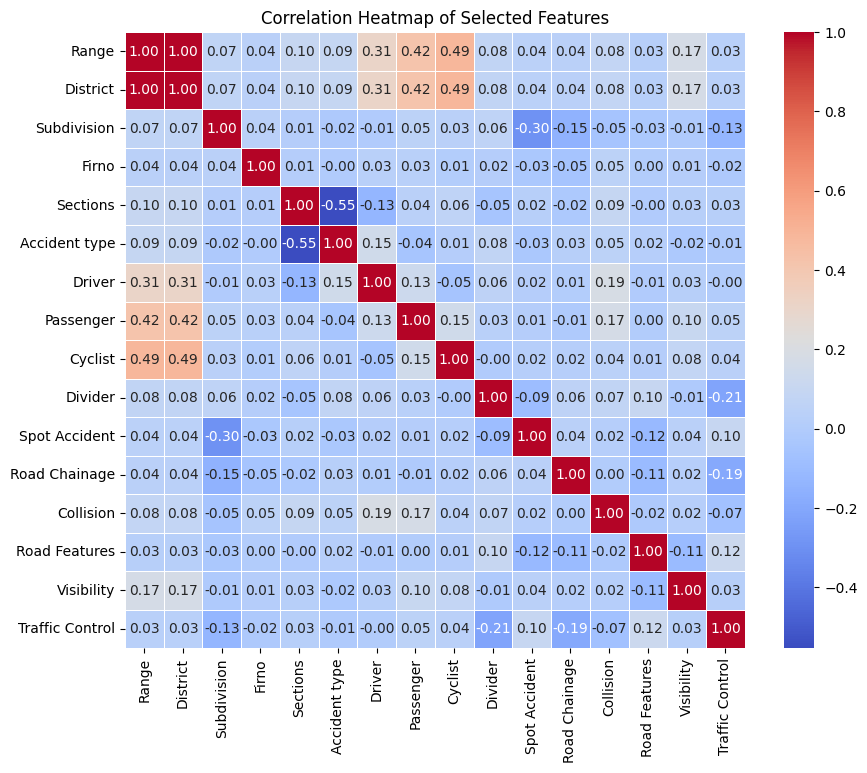

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
# For example, you can load your dataset like this:
# df = pd.read_csv('your_dataset.csv')

# Select the features you want to include in the heatmap
selected_features = df[['Range', 'District', 'Subdivision', 'Firno', 'Sections', 'Accident type', 'Driver', 'Passenger', 'Cyclist', 'Divider', 'Spot Accident', 'Road Chainage', 'Collision', 'Road Features', 'Visibility', 'Traffic Control']]
# Calculate the correlation matrix for the selected features
correlation_matrix = selected_features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()


In [ ]:
features_to_keep = ['Range', 'District', 'Subdivision', 'Firno', 'Sections', 'Accident type', 'Driver', 'Passenger', 'Cyclist', 'Divider', 'Spot Accident', 'Road Chainage', 'Collision', 'Road Features', 'Visibility', 'Traffic Control']
df = df[features_to_keep]

In [ ]:
!pip install scikit-multilearn

**MLP**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical



# Encode the target variable
label_encoder = LabelEncoder()
df['Accident type'] = label_encoder.fit_transform(df['Accident type'])

# Define your feature columns and target variable
X = df.drop('Accident type', axis=1)
y = df['Accident type']

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of classes
number_of_classes = len(np.unique(y))

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)
y_test_one_hot = to_categorical(y_test, num_classes=number_of_classes)

# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, batch_size=64, epochs=20, validation_data=(X_test, y_test_one_hot))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)[1]
print("Accuracy: ", accuracy * 100)


Epoch 1/20
114/114 [==============================] - 8s 12ms/step - loss: 0.9637 - accuracy: 0.6783 - val_loss: 0.7176 - val_accuracy: 0.7290
Epoch 2/20
114/114 [==============================] - 1s 10ms/step - loss: 0.6017 - accuracy: 0.7871 - val_loss: 0.4670 - val_accuracy: 0.8780
Epoch 3/20
114/114 [==============================] - 1s 10ms/step - loss: 0.4043 - accuracy: 0.9059 - val_loss: 0.3386 - val_accuracy: 0.9273
Epoch 4/20
114/114 [==============================] - 1s 12ms/step - loss: 0.3034 - accuracy: 0.9288 - val_loss: 0.2751 - val_accuracy: 0.9305
Epoch 5/20
114/114 [==============================] - 1s 13ms/step - loss: 0.2489 - accuracy: 0.9314 - val_loss: 0.2424 - val_accuracy: 0.9292
Epoch 6/20
114/114 [==============================] - 1s 7ms/step - loss: 0.2177 - accuracy: 0.9325 - val_loss: 0.2216 - val_accuracy: 0.9331
Epoch 7/20
114/114 [==============================] - 1s 9ms/step - loss: 0.1970 - accuracy: 0.9359 - val_loss: 0.2095 - val_accuracy: 0.9495
E

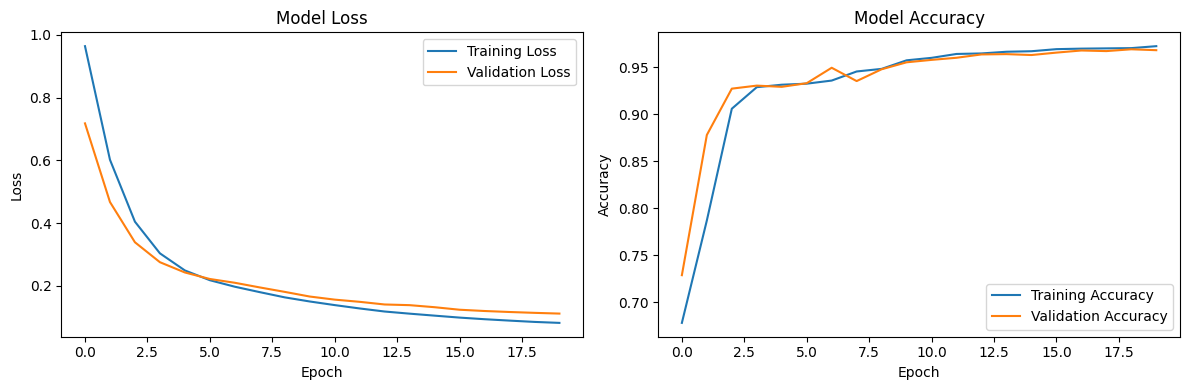

In [ ]:
from matplotlib import pyplot as plt
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**RNN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, Flatten
from keras.utils import to_categorical

# Encode the target variable
label_encoder = LabelEncoder()
df['Accident type'] = label_encoder.fit_transform(df['Accident type'])

# Define your feature columns and target variable
X = df.drop('Accident type', axis=1)
y = df['Accident type']

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of classes
number_of_classes = len(np.unique(y))

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)
y_test_one_hot = to_categorical(y_test, num_classes=number_of_classes)

# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for RNN (SimpleRNN)
n_steps = 1  # Number of time steps
n_features = X_train.shape[1]

X_train = X_train.reshape(X_train.shape[0], n_steps, n_features)
X_test = X_test.reshape(X_test.shape[0], n_steps, n_features)

# Define the model (RNN)
model = Sequential()

# Add a SimpleRNN layer with 32 units and input shape
model.add(SimpleRNN(32, input_shape=(n_steps, n_features), activation='relu'))

# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a dense layer with 128 units
model.add(Dense(128, activation='relu'))

# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))

# Add a flatten layer
model.add(Flatten())

# Add a dense layer with the number of classes and softmax activation for multi-class classification
model.add(Dense(number_of_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with 20 epochs
model.fit(X_train, y_train_one_hot, batch_size=32, epochs=20, validation_data=(X_test, y_test_one_hot))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)[1]
print("Accuracy: ", accuracy * 100)


Epoch 1/20
227/227 [==============================] - 4s 7ms/step - loss: 0.9358 - accuracy: 0.7066 - val_loss: 0.6503 - val_accuracy: 0.7683
Epoch 2/20
227/227 [==============================] - 1s 6ms/step - loss: 0.6464 - accuracy: 0.8038 - val_loss: 0.4413 - val_accuracy: 0.8999
Epoch 3/20
227/227 [==============================] - 1s 6ms/step - loss: 0.4936 - accuracy: 0.8626 - val_loss: 0.3171 - val_accuracy: 0.9285
Epoch 4/20
227/227 [==============================] - 2s 10ms/step - loss: 0.3931 - accuracy: 0.8920 - val_loss: 0.2588 - val_accuracy: 0.9279
Epoch 5/20
227/227 [==============================] - 3s 12ms/step - loss: 0.3261 - accuracy: 0.9078 - val_loss: 0.2207 - val_accuracy: 0.9289
Epoch 6/20
227/227 [==============================] - 3s 11ms/step - loss: 0.2807 - accuracy: 0.9150 - val_loss: 0.2036 - val_accuracy: 0.9298
Epoch 7/20
227/227 [==============================] - 2s 10ms/step - loss: 0.2588 - accuracy: 0.9212 - val_loss: 0.1871 - val_accuracy: 0.9298
Ep

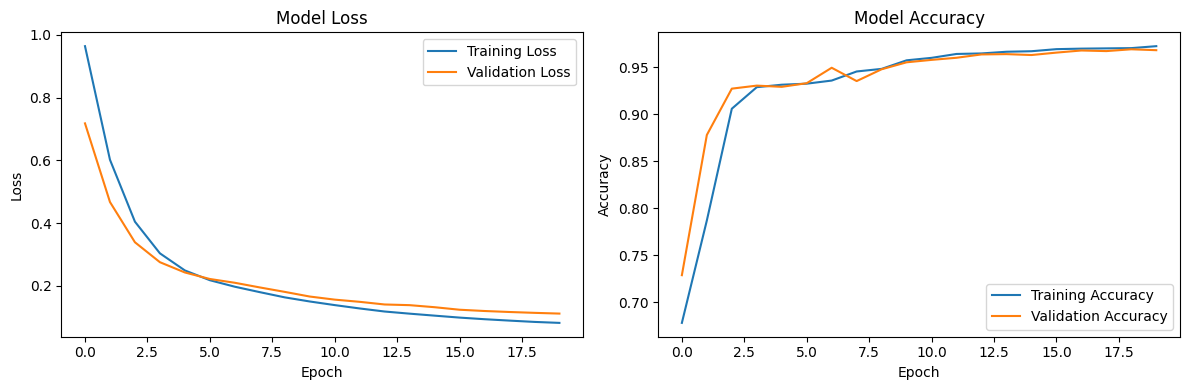

In [ ]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**LSTM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten
from keras.utils import to_categorical



# Encode the target variable
label_encoder = LabelEncoder()
df['Accident type'] = label_encoder.fit_transform(df['Accident type'])

# Define your feature columns and target variable
X = df.drop('Accident type', axis=1)
y = df['Accident type']

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of classes
number_of_classes = len(np.unique(y))

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)
y_test_one_hot = to_categorical(y_test, num_classes=number_of_classes)

# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for LSTM
n_steps = 1
n_features = X.shape[1]
X_train = X_train.reshape(X_train.shape[0], n_steps, n_features)
X_test = X_test.reshape(X_test.shape[0], n_steps, n_features)

# Define the model
model = Sequential()
model.add(LSTM(32, input_shape=(n_steps, n_features), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, batch_size=32, epochs=20, validation_data=(X_test, y_test_one_hot))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)[1]
print("Accuracy: ", accuracy * 100)


Epoch 1/20
227/227 [==============================] - 4s 9ms/step - loss: 0.9875 - accuracy: 0.6878 - val_loss: 0.7014 - val_accuracy: 0.7229
Epoch 2/20
227/227 [==============================] - 3s 12ms/step - loss: 0.6351 - accuracy: 0.7993 - val_loss: 0.4495 - val_accuracy: 0.8989
Epoch 3/20
227/227 [==============================] - 2s 10ms/step - loss: 0.4691 - accuracy: 0.8705 - val_loss: 0.3272 - val_accuracy: 0.9247
Epoch 4/20
227/227 [==============================] - 2s 7ms/step - loss: 0.3579 - accuracy: 0.9032 - val_loss: 0.2512 - val_accuracy: 0.9269
Epoch 5/20
227/227 [==============================] - 2s 8ms/step - loss: 0.2784 - accuracy: 0.9181 - val_loss: 0.2026 - val_accuracy: 0.9257
Epoch 6/20
227/227 [==============================] - 2s 7ms/step - loss: 0.2395 - accuracy: 0.9255 - val_loss: 0.1826 - val_accuracy: 0.9263
Epoch 7/20
227/227 [==============================] - 2s 7ms/step - loss: 0.2192 - accuracy: 0.9310 - val_loss: 0.1627 - val_accuracy: 0.9520
Epoc

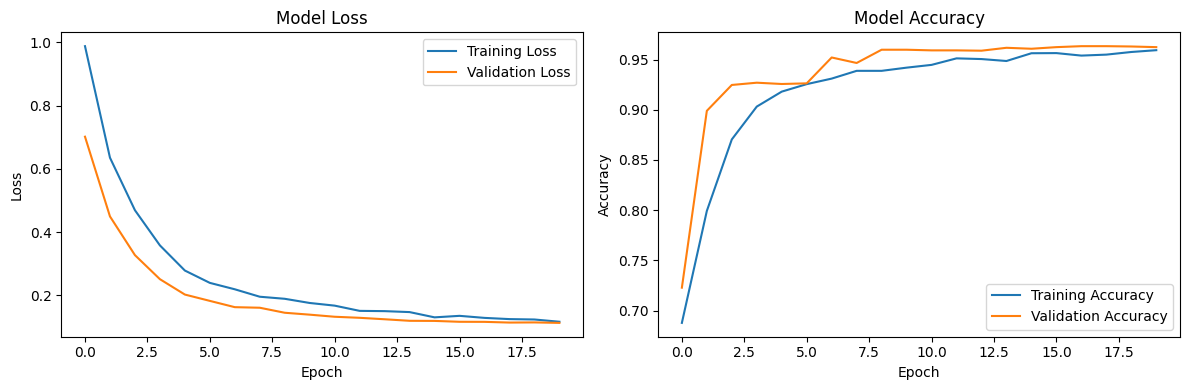

In [ ]:
from matplotlib import pyplot as plt
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**GRU**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Flatten
from keras.utils import to_categorical

# Encode the target variable
label_encoder = LabelEncoder()
df['Accident type'] = label_encoder.fit_transform(df['Accident type'])

# Define your feature columns and target variable
X = df.drop('Accident type', axis=1)
y = df['Accident type']

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of classes
number_of_classes = len(np.unique(y))

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)
y_test_one_hot = to_categorical(y_test, num_classes=number_of_classes)

# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for GRU
n_steps = 1
n_features = X.shape[1]
X_train = X_train.reshape(X_train.shape[0], n_steps, n_features)
X_test = X_test.reshape(X_test.shape[0], n_steps, n_features)

# Define the model
model = Sequential()
model.add(GRU(32, input_shape=(n_steps, n_features), activation='relu', return_sequences=True))
model.add(Dropout(0.25))
model.add(GRU(64, activation='relu', return_sequences=True))
model.add(Dropout(0.25))
model.add(GRU(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, batch_size=32, epochs=20, validation_data=(X_test, y_test_one_hot))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)[1]
print("Accuracy: ", accuracy * 100)


Epoch 1/20
227/227 [==============================] - 11s 23ms/step - loss: 1.0058 - accuracy: 0.6994 - val_loss: 0.7948 - val_accuracy: 0.7216
Epoch 2/20
227/227 [==============================] - 4s 17ms/step - loss: 0.7417 - accuracy: 0.7344 - val_loss: 0.4924 - val_accuracy: 0.8835
Epoch 3/20
227/227 [==============================] - 4s 19ms/step - loss: 0.4646 - accuracy: 0.8661 - val_loss: 0.2696 - val_accuracy: 0.9266
Epoch 4/20
227/227 [==============================] - 5s 20ms/step - loss: 0.3374 - accuracy: 0.8997 - val_loss: 0.2165 - val_accuracy: 0.9273
Epoch 5/20
227/227 [==============================] - 4s 16ms/step - loss: 0.2723 - accuracy: 0.9156 - val_loss: 0.1750 - val_accuracy: 0.9392
Epoch 6/20
227/227 [==============================] - 4s 16ms/step - loss: 0.2338 - accuracy: 0.9240 - val_loss: 0.1541 - val_accuracy: 0.9549
Epoch 7/20
227/227 [==============================] - 5s 24ms/step - loss: 0.2070 - accuracy: 0.9277 - val_loss: 0.1384 - val_accuracy: 0.960

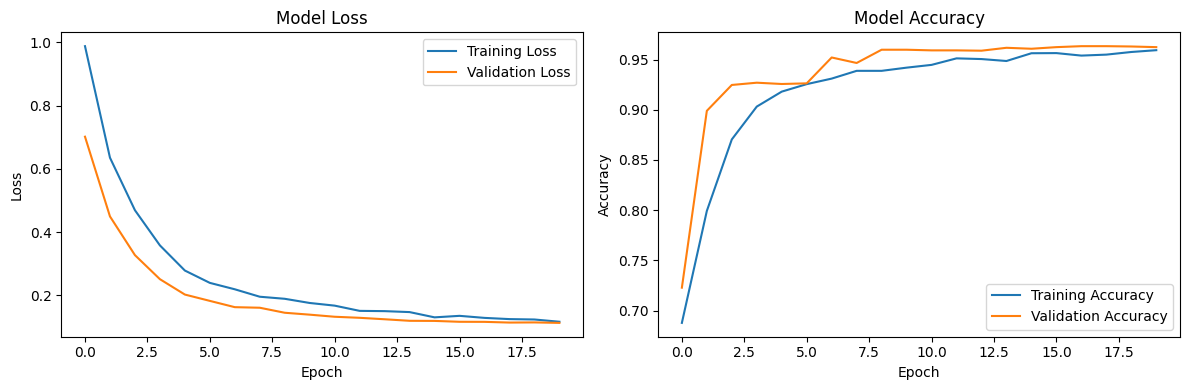

In [ ]:
from matplotlib import pyplot as plt
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**Coyote optmization**

In [ ]:
!pip install mealpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 78.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_excel("/content/merged_data.xlsx")

In [ ]:
import pandas as pd
# Get the list of feature names
feature_names = df.columns
lst = []
# Print the feature names
for feature in feature_names:
    lst.append(feature)
print(lst)

['Zone', 'Range', 'District', 'Subdivision', 'Circle', 'PS Name', 'Firno', 'Date Report', 'Date Accident', 'Time Report', 'Time Accident', 'Sections', 'Accident type', 'Death', 'Grievous', 'Minor', 'Driver', 'Passenger', 'Pedestrian', 'Cyclist', 'Other Persons', 'Motorised', 'Non Motorised', 'Latitude', 'Longitude', 'Place of Occurance', 'Type Area', 'On going road works', 'City/Town/ Village', 'Lanes Road', 'Divider', 'Spot Accident', 'Speed Limit', 'Weather', 'Road No', 'Road Surface', 'T -Junction', 'Road Chainage', 'Hit Run', 'Collision', 'Type Road', 'Cause Accident', 'Road Features', 'Visibility', 'Traffic Control', 'Vehicle Type']


In [ ]:
df['Accident type'].fillna('Non Injury', inplace=True)


In [ ]:
# Get all unique values in the 'Column1' of the DataFrame
unique_values = df['Accident type'].unique()

# Print the unique values
print(unique_values)

['Grevious Injury' 'Minor Injury' 'Fatal' 'Non Injury']


In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['Zone', 'Range', 'District', 'Subdivision', 'Circle', 'PS Name', 'Firno', 'Date Report', 'Date Accident', 'Time Report', 'Time Accident', 'Sections', 'Accident type', 'Death', 'Grievous', 'Minor', 'Driver', 'Passenger', 'Pedestrian', 'Cyclist', 'Other Persons', 'Motorised', 'Non Motorised', 'Latitude', 'Longitude', 'Place of Occurance', 'Type Area', 'On going road works', 'City/Town/ Village', 'Lanes Road', 'Divider', 'Spot Accident', 'Speed Limit', 'Weather', 'Road No', 'Road Surface', 'T -Junction', 'Road Chainage', 'Hit Run', 'Collision', 'Type Road', 'Cause Accident', 'Road Features', 'Visibility', 'Traffic Control', 'Vehicle Type']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
X = df.drop('Accident type', axis=1)
y = df['Accident type']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Define your dataset X and labels y here
# Replace X and y with your dataset and target variable
X = df.drop(columns=['Accident type'])  # Exclude the target variable column
y = df['Accident type']

# Define the number of features you want to select
n_features = 25  # Adjust this based on your requirements

# Define your optimization objective function
def optimization_objective(selected_features):
    # Create a mask for feature selection
    feature_mask = np.zeros(X.shape[1], dtype=bool)
    feature_mask[selected_features] = True

    # Split the dataset into training and testing sets using the mask
    X_selected = X.loc[:, feature_mask]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

    # Create a classifier (e.g., Decision Tree Classifier)
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    # Since COA minimizes the objective function, return the negative accuracy
    return -accuracy

# Coyote Optimization Algorithm for feature selection
def COA(FOBJ, nfevalMAX, n_features):
    # Define your COA algorithm parameters here
    # You may adjust these parameters as needed
    D = n_features  # Problem dimension (number of features)
    n_coyotes = 10  # Number of coyotes in a pack
    n_packs = 5  # Number of packs
    p_leave = 0.1  # Probability of leaving a pack
    Ps = 1/D  # Probability of selecting a feature
    VarMin = np.zeros(D)  # Lower boundaries for features
    VarMax = np.ones(D)  # Upper boundaries for features
    max_age = 10  # Maximum age of a coyote

    # Initialize coyotes
    coyotes = np.random.rand(n_packs, n_coyotes, D)  # Initialize coyotes randomly
    costs = np.zeros((n_packs, n_coyotes))
    ages = np.zeros((n_packs, n_coyotes))

    # Main loop
    for iteration in range(nfevalMAX):
        # Update coyotes
        for p in range(n_packs):
            for c in range(n_coyotes):
                # Evaluate the cost of each coyote's subset of features
                selected_features = np.where(coyotes[p, c] > 0.5)[0]
                costs[p, c] = FOBJ(selected_features)
                # Age the coyotes
                ages[p, c] += 1

        # Select alpha coyotes
        alpha_indices = np.unravel_index(np.argmin(costs, axis=None), costs.shape)
        alpha_costs = costs[alpha_indices]
        alpha_ages = ages[alpha_indices]

        # Update selected features
        alpha_features = np.where(coyotes[alpha_indices] > 0.5)[0]
        if alpha_costs < 0:
            print(f"Iteration {iteration}: Best accuracy = {-alpha_costs}, Age = {alpha_ages}")
            print("Selected Features:", alpha_features)

        # Update packs
        for p in range(n_packs):
            for c in range(n_coyotes):
                if np.random.random() < p_leave:
                    # Coyote leaves the pack
                    new_pack = np.random.randint(0, n_packs)
                    coyotes[new_pack, c] = coyotes[p, c]
                    costs[new_pack, c] = costs[p, c]
                    ages[new_pack, c] = ages[p, c]
                    coyotes[p, c] = np.random.rand(D)  # Replace coyote with a new one

        # Mutate coyotes
        for p in range(n_packs):
            for c in range(n_coyotes):
                random_pack = np.random.randint(0, n_packs)
                random_coyote = np.random.randint(0, n_coyotes)
                beta = 0.5
                F = 0.5
                r = np.random.rand(D)
                new_coyote = coyotes[p, c] + F * (coyotes[random_pack, random_coyote] - coyotes[p, c]) + beta * (coyotes[random_pack, random_coyote] - coyotes[p, c])
                new_coyote = np.minimum(1, np.maximum(0, new_coyote))
                coyotes[p, c] = new_coyote

    # Find the best alpha coyote
    best_alpha_pack, best_alpha_coyote = alpha_indices
    best_alpha_features = np.where(coyotes[best_alpha_pack, best_alpha_coyote] > 0.5)[0]
    best_alpha_cost = -alpha_costs
    print("\nBest Alpha Coyote (Final):")
    print("Selected Features:", best_alpha_features)
    print("Accuracy:", best_alpha_cost)

# Call the COA algorithm to perform feature selection
nfevalmax = 50  # Maximum number of function evaluations
COA(optimization_objective, nfevalmax, n_features)


Iteration 0: Best accuracy = 0.9996781461216607, Age = 1.0
Selected Features: [ 0  2  5  6  7  8  9 10 12 13 14 15 16 17 18 21 23 24]
Iteration 1: Best accuracy = 0.9996781461216607, Age = 2.0
Selected Features: [ 1  3  4  7  8  9 10 11 12 13 14 16 18 21 22 24]
Iteration 2: Best accuracy = 0.9996781461216607, Age = 3.0
Selected Features: [ 1  3  4  7  8  9 10 11 12 13 14 16 18 21 22 24]
Iteration 3: Best accuracy = 0.9993562922433216, Age = 4.0
Selected Features: [ 0  2  4  6  7  8  9 10 11 12 13 15 16 17 19 20 21 22 23]
Iteration 4: Best accuracy = 0.9993562922433216, Age = 5.0
Selected Features: [ 0  2  4  6  7  8  9 10 11 12 13 15 16 17 19 20 21 22 23]
Iteration 5: Best accuracy = 0.9993562922433216, Age = 6.0
Selected Features: [ 0  2  4  6  7  8  9 10 11 12 13 15 16 17 19 20 21 22 23]
Iteration 6: Best accuracy = 1.0, Age = 7.0
Selected Features: [ 0  1  2  3  7  8 10 11 12 13 14 18 19]
Iteration 7: Best accuracy = 1.0, Age = 8.0
Selected Features: [ 0  1  2  3  7  8 10 11 12 13 1

In [ ]:
selected_features_indices =  [ 1 , 5,  6, 10 ,11, 12, 13 ,15, 17, 18, 21, 22, 23, 24]
selected_feature_names = X.columns[selected_features_indices]
print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: Index(['Range', 'PS Name', 'Firno', 'Time Accident', 'Sections', 'Death',
       'Grievous', 'Driver', 'Pedestrian', 'Cyclist', 'Non Motorised',
       'Latitude', 'Longitude', 'Place of Occurance'],
      dtype='object')


**Selected Features**

<ipython-input-17-32ab04555a30>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_features.corr()


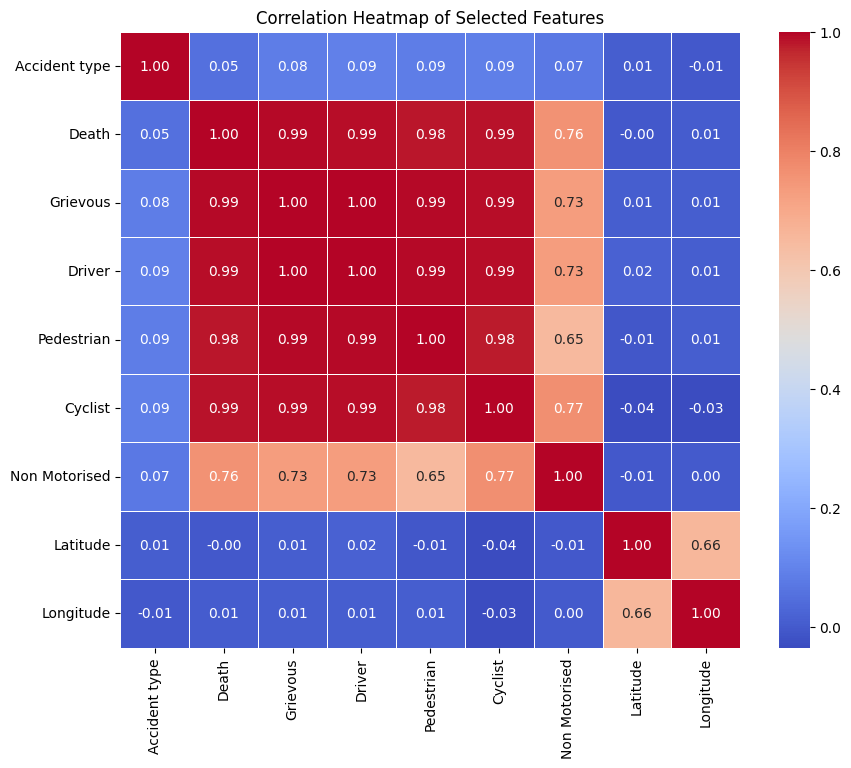

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
# For example, you can load your dataset like this:
# df = pd.read_csv('your_dataset.csv')

# Select the features you want to include in the heatmap
selected_features = df[['Range', 'PS Name', 'Firno', 'Time Accident', 'Sections', 'Accident type','Death',
       'Grievous', 'Driver', 'Pedestrian', 'Cyclist', 'Non Motorised',
       'Latitude', 'Longitude', 'Place of Occurance']]  # Replace with your feature names

# Calculate the correlation matrix for the selected features
correlation_matrix = selected_features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

In [ ]:
df = pd.read_excel("/content/merged_data.xlsx")

In [ ]:
unique_values = df['Accident type'].unique()

# Print the unique values
print(unique_values)

[1 2 0 3]


In [ ]:
df['Accident type'] = df['Accident type'].replace("", 'Non Injury')

In [ ]:
df['Accident type'].fillna("Non Injury", inplace=True)

In [ ]:
unique_values = df['Accident type'].unique()

# Print the unique values
print(unique_values)

[1 2 0 3]


In [ ]:
features_to_keep =  ['Range', 'PS Name', 'Firno', 'Time Accident', 'Sections', 'Accident type','Death',
       'Grievous', 'Driver', 'Pedestrian', 'Cyclist', 'Non Motorised',
       'Latitude', 'Longitude', 'Place of Occurance']
df = df[features_to_keep]


In [ ]:
X = df.drop('Accident type', axis=1)
y = df['Accident type']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
!pip install scikit-multilearn

**MLP**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical



# Encode the target variable
label_encoder = LabelEncoder()
df['Accident type'] = label_encoder.fit_transform(df['Accident type'])

# Define your feature columns and target variable
X = df.drop('Accident type', axis=1)
y = df['Accident type']

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of classes
number_of_classes = len(np.unique(y))

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)
y_test_one_hot = to_categorical(y_test, num_classes=number_of_classes)

# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, batch_size=64, epochs=20, validation_data=(X_test, y_test_one_hot))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)[1]
print("Accuracy: ", accuracy * 100)


Epoch 1/20
114/114 [==============================] - 2s 6ms/step - loss: 0.6137 - accuracy: 0.7989 - val_loss: 0.2203 - val_accuracy: 0.9244
Epoch 2/20
114/114 [==============================] - 1s 5ms/step - loss: 0.1486 - accuracy: 0.9628 - val_loss: 0.0933 - val_accuracy: 0.9874
Epoch 3/20
114/114 [==============================] - 1s 5ms/step - loss: 0.0649 - accuracy: 0.9939 - val_loss: 0.0542 - val_accuracy: 0.9968
Epoch 4/20
114/114 [==============================] - 1s 5ms/step - loss: 0.0379 - accuracy: 0.9978 - val_loss: 0.0416 - val_accuracy: 0.9977
Epoch 5/20
114/114 [==============================] - 1s 5ms/step - loss: 0.0282 - accuracy: 0.9982 - val_loss: 0.0361 - val_accuracy: 0.9977
Epoch 6/20
114/114 [==============================] - 1s 5ms/step - loss: 0.0233 - accuracy: 0.9982 - val_loss: 0.0325 - val_accuracy: 0.9977
Epoch 7/20
114/114 [==============================] - 1s 5ms/step - loss: 0.0197 - accuracy: 0.9983 - val_loss: 0.0299 - val_accuracy: 0.9977
Epoch 

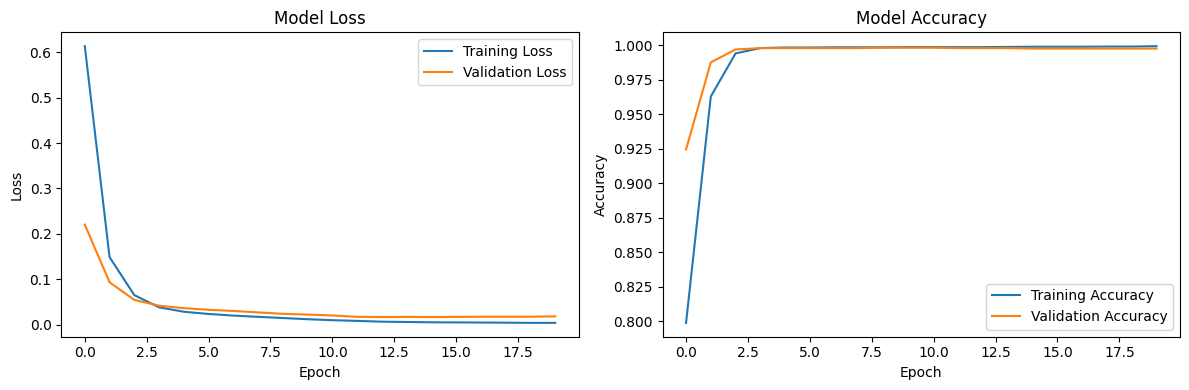

In [ ]:
from matplotlib import pyplot as plt
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**RNN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, Flatten
from keras.utils import to_categorical

# Encode the target variable
label_encoder = LabelEncoder()
df['Accident type'] = label_encoder.fit_transform(df['Accident type'])

# Define your feature columns and target variable
X = df.drop('Accident type', axis=1)
y = df['Accident type']

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of classes
number_of_classes = len(np.unique(y))

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)
y_test_one_hot = to_categorical(y_test, num_classes=number_of_classes)

# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for RNN (SimpleRNN)
n_steps = 1  # Number of time steps
n_features = X_train.shape[1]

X_train = X_train.reshape(X_train.shape[0], n_steps, n_features)
X_test = X_test.reshape(X_test.shape[0], n_steps, n_features)

# Define the model (RNN)
model = Sequential()

# Add a SimpleRNN layer with 32 units and input shape
model.add(SimpleRNN(32, input_shape=(n_steps, n_features), activation='relu'))

# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a dense layer with 128 units
model.add(Dense(128, activation='relu'))

# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))

# Add a flatten layer
model.add(Flatten())

# Add a dense layer with the number of classes and softmax activation for multi-class classification
model.add(Dense(number_of_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with 20 epochs
history = model.fit(X_train, y_train_one_hot, batch_size=32, epochs=10, validation_data=(X_test, y_test_one_hot))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)[1]
print("Accuracy: ", accuracy * 100)


Epoch 1/10
227/227 [==============================] - 3s 7ms/step - loss: 0.6529 - accuracy: 0.7935 - val_loss: 0.1891 - val_accuracy: 0.9434
Epoch 2/10
227/227 [==============================] - 2s 9ms/step - loss: 0.2240 - accuracy: 0.9277 - val_loss: 0.1046 - val_accuracy: 0.9781
Epoch 3/10
227/227 [==============================] - 2s 7ms/step - loss: 0.1420 - accuracy: 0.9543 - val_loss: 0.0646 - val_accuracy: 0.9936
Epoch 4/10
227/227 [==============================] - 1s 6ms/step - loss: 0.1057 - accuracy: 0.9717 - val_loss: 0.0447 - val_accuracy: 0.9968
Epoch 5/10
227/227 [==============================] - 1s 6ms/step - loss: 0.0756 - accuracy: 0.9801 - val_loss: 0.0349 - val_accuracy: 0.9981
Epoch 6/10
227/227 [==============================] - 1s 6ms/step - loss: 0.0598 - accuracy: 0.9855 - val_loss: 0.0311 - val_accuracy: 0.9981
Epoch 7/10
227/227 [==============================] - 1s 6ms/step - loss: 0.0426 - accuracy: 0.9909 - val_loss: 0.0281 - val_accuracy: 0.9977
Epoch 

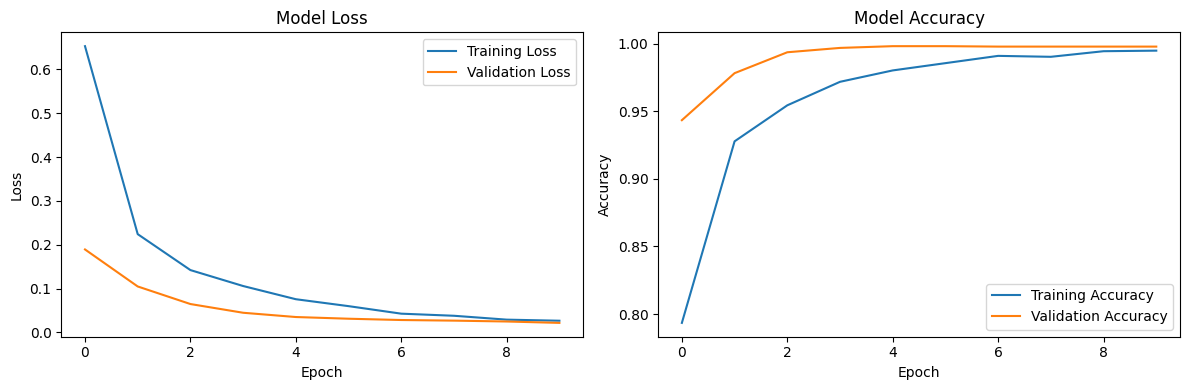

In [ ]:
from matplotlib import pyplot as plt
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**LSTM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten
from keras.utils import to_categorical



# Encode the target variable
label_encoder = LabelEncoder()
df['Accident type'] = label_encoder.fit_transform(df['Accident type'])

# Define your feature columns and target variable
X = df.drop('Accident type', axis=1)
y = df['Accident type']

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of classes
number_of_classes = len(np.unique(y))

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)
y_test_one_hot = to_categorical(y_test, num_classes=number_of_classes)

# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for LSTM
n_steps = 1
n_features = X.shape[1]
X_train = X_train.reshape(X_train.shape[0], n_steps, n_features)
X_test = X_test.reshape(X_test.shape[0], n_steps, n_features)

# Define the model
model = Sequential()
model.add(LSTM(32, input_shape=(n_steps, n_features), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, batch_size=32, epochs=20, validation_data=(X_test, y_test_one_hot))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)[1]
print("Accuracy: ", accuracy * 100)


Epoch 1/20
227/227 [==============================] - 4s 9ms/step - loss: 0.7004 - accuracy: 0.7761 - val_loss: 0.2125 - val_accuracy: 0.9263
Epoch 2/20
227/227 [==============================] - 2s 8ms/step - loss: 0.1887 - accuracy: 0.9334 - val_loss: 0.1069 - val_accuracy: 0.9540
Epoch 3/20
227/227 [==============================] - 2s 9ms/step - loss: 0.1226 - accuracy: 0.9603 - val_loss: 0.0709 - val_accuracy: 0.9891
Epoch 4/20
227/227 [==============================] - 3s 13ms/step - loss: 0.0794 - accuracy: 0.9799 - val_loss: 0.0450 - val_accuracy: 0.9971
Epoch 5/20
227/227 [==============================] - 2s 8ms/step - loss: 0.0533 - accuracy: 0.9886 - val_loss: 0.0380 - val_accuracy: 0.9974
Epoch 6/20
227/227 [==============================] - 2s 8ms/step - loss: 0.0417 - accuracy: 0.9930 - val_loss: 0.0344 - val_accuracy: 0.9971
Epoch 7/20
227/227 [==============================] - 2s 8ms/step - loss: 0.0344 - accuracy: 0.9931 - val_loss: 0.0321 - val_accuracy: 0.9971
Epoch

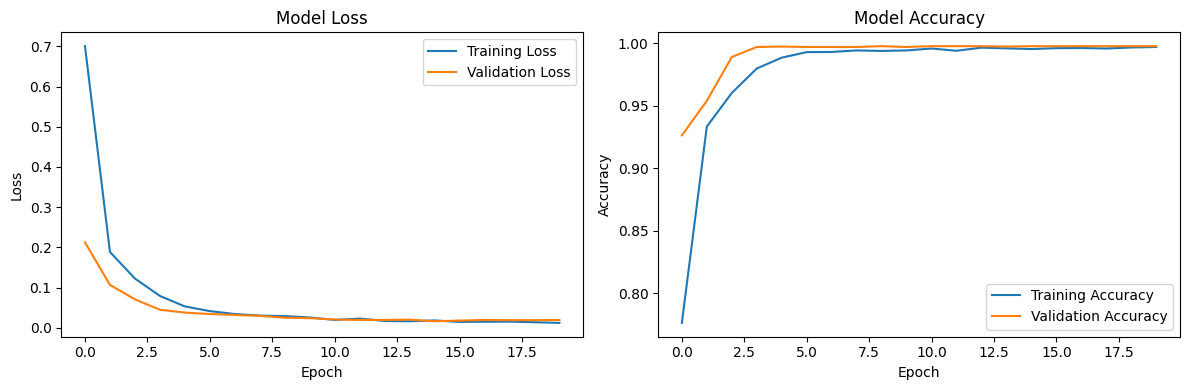

In [ ]:
from matplotlib import pyplot as plt
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**GRU**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Flatten
from keras.utils import to_categorical

# Encode the target variable
label_encoder = LabelEncoder()
df['Accident type'] = label_encoder.fit_transform(df['Accident type'])

# Define your feature columns and target variable
X = df.drop('Accident type', axis=1)
y = df['Accident type']

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of classes
number_of_classes = len(np.unique(y))

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)
y_test_one_hot = to_categorical(y_test, num_classes=number_of_classes)

# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for GRU
n_steps = 1
n_features = X.shape[1]
X_train = X_train.reshape(X_train.shape[0], n_steps, n_features)
X_test = X_test.reshape(X_test.shape[0], n_steps, n_features)

# Define the model
model = Sequential()
model.add(GRU(32, input_shape=(n_steps, n_features), activation='relu', return_sequences=True))
model.add(Dropout(0.25))
model.add(GRU(64, activation='relu', return_sequences=True))
model.add(Dropout(0.25))
model.add(GRU(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, batch_size=32, epochs=40, validation_data=(X_test, y_test_one_hot))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)[1]
print("Accuracy: ", accuracy * 100)


Epoch 1/40
227/227 [==============================] - 63s 17ms/step - loss: 0.6196 - accuracy: 0.8131 - val_loss: 0.1513 - val_accuracy: 0.9292
Epoch 2/40
227/227 [==============================] - 3s 14ms/step - loss: 0.1574 - accuracy: 0.9412 - val_loss: 0.0995 - val_accuracy: 0.9733
Epoch 3/40
227/227 [==============================] - 4s 20ms/step - loss: 0.1082 - accuracy: 0.9644 - val_loss: 0.0624 - val_accuracy: 0.9958
Epoch 4/40
227/227 [==============================] - 3s 15ms/step - loss: 0.0836 - accuracy: 0.9757 - val_loss: 0.0409 - val_accuracy: 0.9974
Epoch 5/40
227/227 [==============================] - 3s 15ms/step - loss: 0.0559 - accuracy: 0.9850 - val_loss: 0.0357 - val_accuracy: 0.9974
Epoch 6/40
227/227 [==============================] - 4s 18ms/step - loss: 0.0471 - accuracy: 0.9902 - val_loss: 0.0278 - val_accuracy: 0.9974
Epoch 7/40
227/227 [==============================] - 4s 16ms/step - loss: 0.0361 - accuracy: 0.9926 - val_loss: 0.0278 - val_accuracy: 0.997

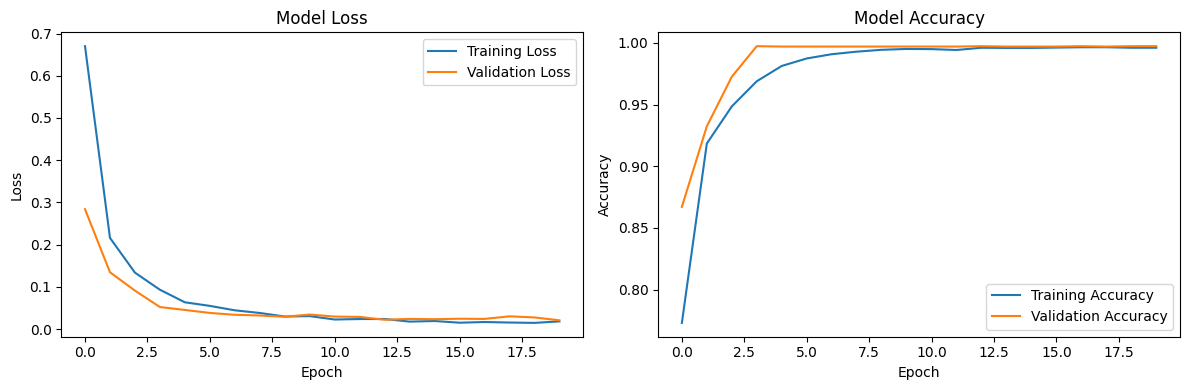

In [ ]:
from matplotlib import pyplot as plt
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**Ensembling**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Encode the target variable
label_encoder = LabelEncoder()
df['Accident type'] = label_encoder.fit_transform(df['Accident type'])

# Define your feature columns and target variable
X = df.drop('Accident type', axis=1)
y = df['Accident type']

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of classes
number_of_classes = len(np.unique(y))

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)
y_test_one_hot = to_categorical(y_test, num_classes=number_of_classes)

# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for RNN (SimpleRNN)
n_steps = 1  # Number of time steps
n_features = X_train.shape[1]

X_train_rnn = X_train.reshape(X_train.shape[0], n_steps, n_features)
X_test_rnn = X_test.reshape(X_test.shape[0], n_steps, n_features)

# Define the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(32, input_shape=(n_steps, n_features), activation='relu'))
rnn_model.add(Dropout(0.25))
rnn_model.add(Dense(128, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Flatten())
rnn_model.add(Dense(number_of_classes, activation='softmax'))
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the RNN model and collect the training history
history_rnn = rnn_model.fit(X_train_rnn, y_train_one_hot, batch_size=32, epochs=10, validation_data=(X_test_rnn, y_test_one_hot))

# Reshape the data for LSTM
n_steps = 1
n_features = X_train.shape[1]
X_train_lstm = X_train.reshape(X_train.shape[0], n_steps, n_features)
X_test_lstm = X_test.reshape(X_test.shape[0], n_steps, n_features)

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(32, input_shape=(n_steps, n_features), activation='relu'))
lstm_model.add(Dropout(0.25))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Flatten())
lstm_model.add(Dense(number_of_classes, activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model and collect the training history
history_lstm = lstm_model.fit(X_train_lstm, y_train_one_hot, batch_size=32, epochs=10, validation_data=(X_test_lstm, y_test_one_hot))

# Make predictions using both models
y_pred_rnn = rnn_model.predict(X_test_rnn)
y_pred_lstm = lstm_model.predict(X_test_lstm)

from keras.layers import Input
from keras.models import Model
from keras.layers import concatenate

# Train the RNN and LSTM models as you've done in your code

# Combine the predictions of the RNN and LSTM models
combined_predictions = concatenate([y_pred_rnn, y_pred_lstm], axis=-1)

# Define an ensemble model
input_layer = Input(shape=(combined_predictions.shape[1],))
ensemble_model = Dense(number_of_classes, activation='softmax')(input_layer)

model = Model(inputs=input_layer, outputs=ensemble_model)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the ensemble model using the combined predictions
history_ensemble = model.fit(combined_predictions, y_test_one_hot, batch_size=32, epochs=10)
# Evaluate the ensemble model
ensemble_accuracy = model.evaluate(combined_predictions, y_test_one_hot, verbose=0)
print("Ensemble Accuracy:", ensemble_accuracy[1])



Epoch 1/10
227/227 [==============================] - 2s 3ms/step - loss: 0.5955 - accuracy: 0.8071 - val_loss: 0.1831 - val_accuracy: 0.9260
Epoch 2/10
227/227 [==============================] - 1s 2ms/step - loss: 0.2109 - accuracy: 0.9251 - val_loss: 0.1095 - val_accuracy: 0.9414
Epoch 3/10
227/227 [==============================] - 1s 2ms/step - loss: 0.1477 - accuracy: 0.9480 - val_loss: 0.0811 - val_accuracy: 0.9961
Epoch 4/10
227/227 [==============================] - 1s 2ms/step - loss: 0.1097 - accuracy: 0.9650 - val_loss: 0.0637 - val_accuracy: 0.9916
Epoch 5/10
227/227 [==============================] - 1s 2ms/step - loss: 0.0869 - accuracy: 0.9779 - val_loss: 0.0485 - val_accuracy: 0.9965
Epoch 6/10
227/227 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9828 - val_loss: 0.0396 - val_accuracy: 0.9977
Epoch 7/10
227/227 [==============================] - 1s 2ms/step - loss: 0.0550 - accuracy: 0.9887 - val_loss: 0.0332 - val_accuracy: 0.9977
Epoch 

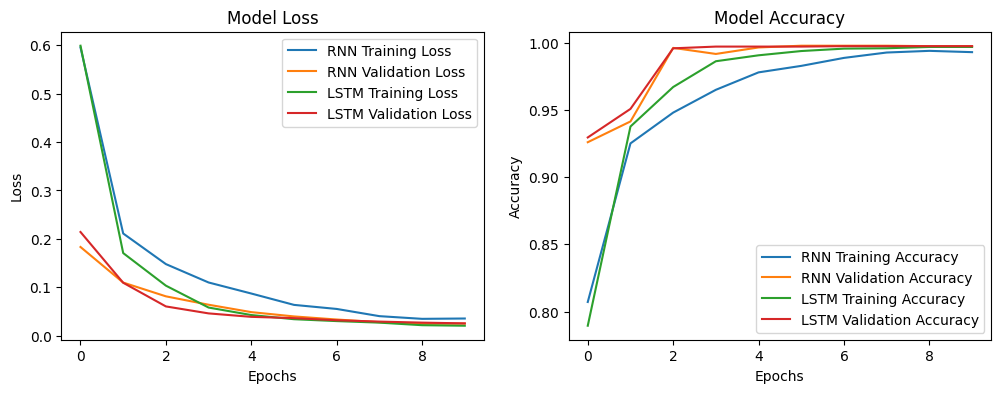

In [ ]:
import matplotlib.pyplot as plt

# Train the ensemble model as you've done

# Plot the loss and accuracy curves for the ensemble model
plt.figure(figsize=(12, 4))

# Loss curves
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='RNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss')
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy')
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.show()


98/98 [==============================] - 0s 892us/step


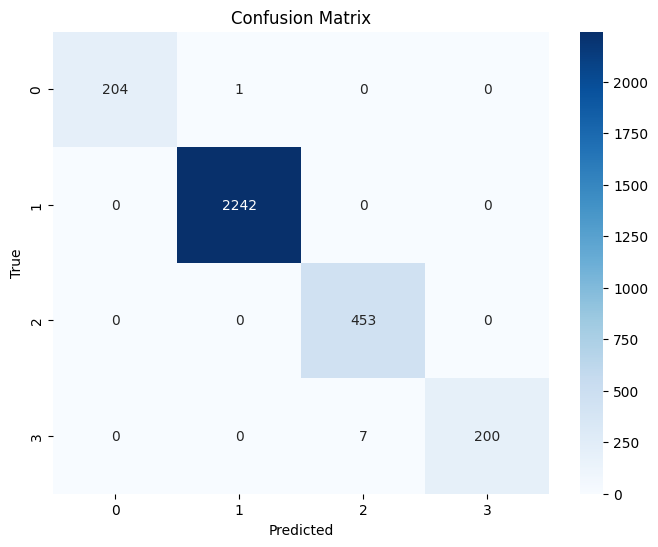

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have predictions and true labels for your ensemble model
true_labels = np.argmax(y_test_one_hot, axis=1)
ensemble_labels = np.argmax(model.predict(combined_predictions), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, ensemble_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np

# Make predictions using the ensemble model
y_pred_ensemble = model.predict(combined_predictions)

# Convert one-hot encoded labels back to integer labels
y_test_int = np.argmax(y_test_one_hot, axis=1)
y_pred_int = np.argmax(y_pred_ensemble, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_int)

# Calculate precision
precision = precision_score(y_test_int, y_pred_int, average='weighted')

# Calculate recall
recall = recall_score(y_test_int, y_pred_int, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test_int, y_pred_int, average='weighted')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test_one_hot, y_pred_ensemble, average='weighted')

# Generate the classification report
class_names = [str(i) for i in range(number_of_classes)]
report = classification_report(y_test_int, y_pred_int, target_names=class_names)

# Print classification metrics
print("Classification Metrics for the Ensemble Model:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:")
print(report)


98/98 [==============================] - 0s 2ms/step
Classification Metrics for the Ensemble Model:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00      2242
           2       0.98      1.00      0.99       453
           3       1.00      0.97      0.98       207

    accuracy                           1.00      3107
   macro avg       1.00      0.99      0.99      3107
weighted avg       1.00      1.00      1.00      3107

